In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [3]:
df['Variance_Wavelet'] = df['3.6216']

In [4]:
df.head(1)

,3.6216,8.6661,-2.8073,-0.44699,0,Variance_Wavelet
0,4.5459,8.1674,-2.4586,-1.4621,0,4.5459


In [5]:
df['Skewness_Wavelet'] = df['8.6661']

In [6]:
df.head(1)

,3.6216,8.6661,-2.8073,-0.44699,0,Variance_Wavelet,Skewness_Wavelet
0,4.5459,8.1674,-2.4586,-1.4621,0,4.5459,8.1674


In [7]:
df['Curtosis_Wavelet'] = df['-2.8073']

In [8]:
df.head(1)

,3.6216,8.6661,-2.8073,-0.44699,0,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet
0,4.5459,8.1674,-2.4586,-1.4621,0,4.5459,8.1674,-2.4586


In [9]:
df['Image_Entropy'] = df['-0.44699']

In [10]:
df.head(1)

,3.6216,8.6661,-2.8073,-0.44699,0,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy
0,4.5459,8.1674,-2.4586,-1.4621,0,4.5459,8.1674,-2.4586,-1.4621


In [11]:
df['Class'] = df['0']

In [12]:
df.head(1)

,3.6216,8.6661,-2.8073,-0.44699,0,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,4.5459,8.1674,-2.4586,-1.4621,0,4.5459,8.1674,-2.4586,-1.4621,0


In [13]:
df= df.drop(['3.6216', '8.6661', '-2.8073', '-0.44699', '0'], axis = 1)

In [14]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [15]:
df.shape

(1371, 5)

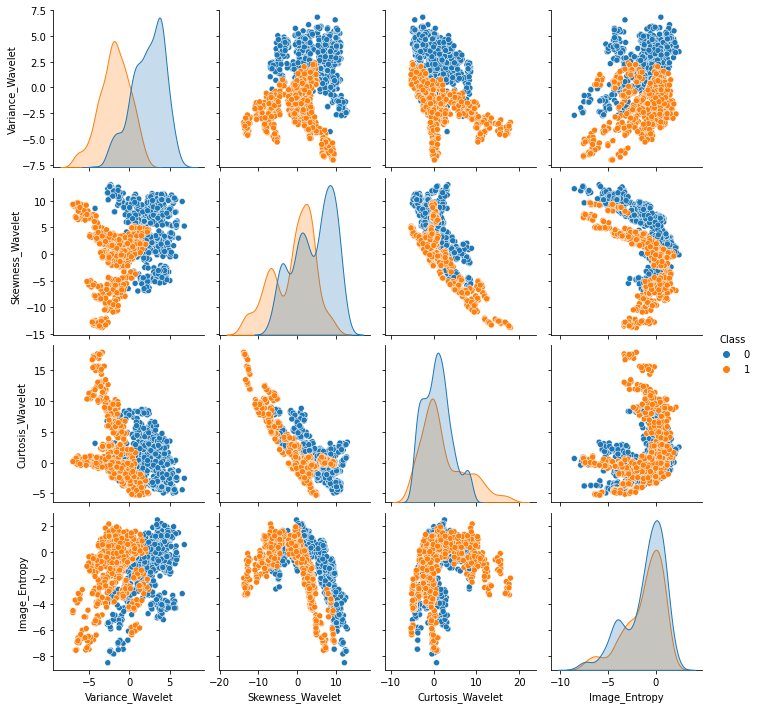

In [16]:
sns.pairplot(df, hue = 'Class')

In [17]:
X = df.drop('Class', axis = 1)

In [18]:
y = df['Class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
n_estimators = [64,100,128,200]

In [30]:
max_features = [2,3,4]

In [31]:
bootstrap = [True, False]

In [32]:
oob_score = [True, False]

In [33]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'bootstrap' : bootstrap,
             'oob_score' : oob_score}

In [34]:
rfc = RandomForestClassifier()

In [35]:
grid = GridSearchCV(rfc, param_grid)

In [37]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [38]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [39]:
rfc = RandomForestClassifier(max_features = 2, n_estimators = 128, oob_score = True)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [43]:
rfc.oob_score_

0.9939914163090129

In [44]:
predictions = rfc.predict(X_test)

In [49]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        93

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



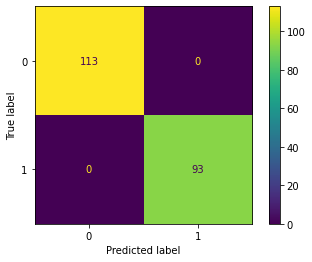

In [51]:
plot_confusion_matrix(rfc, X_test, y_test)

In [59]:
predictions

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [60]:
y_test

933     1
256     0
552     0
420     0
1242    1
       ..
1006    1
209     0
1120    1
1082    1
23      0
Name: Class, Length: 206, dtype: int64

In [61]:
y_test != predictions

933     False
256     False
552     False
420     False
1242    False
        ...  
1006    False
209     False
1120    False
1082    False
23      False
Name: Class, Length: 206, dtype: bool

In [63]:
np.sum(y_test != predictions)

0

In [66]:
errors = []
missclassifications = []

for n in range(1, 200):
    
    rfc = RandomForestClassifier(n_estimators= n, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    missclassifications.append(n_missed)

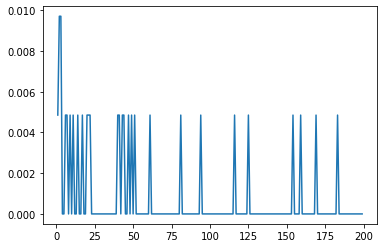

In [69]:
plt.plot(range(1, 200), errors)

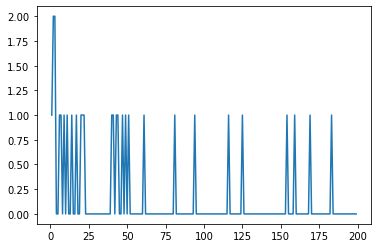

In [68]:
plt.plot(range(1, 200), missclassifications)